## Discrete Random Variables

The _probability mass function_ of a discrete random variable $X$ is the function $f: R \to [0, 1]$ given by $f(x) = P(X = x)$. 

`Bernoulli distribution`: an random variable $X$ is said to have the Bernoulli distribution with parameter $p$ if $P(X=1)=p$ and $P(X=0) = 1- p$, where $0 <p < 1$. 

`Binomial distribution`: suppose that n _independent_ Bernoulli trials are performed, each with the same success probability $p$. Let $X$ be the number of success, then we have
$$P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}$$

`Poisson distribution`: if a random variable $X$ takes values in the set $\{0, 1, 2, \cdots \}$ with mass function
$$f(k)= \frac{\lambda^k}{k!} e^{-\lambda}, \ \ \ k = 0, 1, 2, \cdots$$
where $\lambda > 0$, then $X$ is said to have the Poisson distribution with parameter $\lambda$.

The _cumulative distribution function (CDF)_ of an random variable $X$ is the function $F_X$ given by $F_X(x) = P(X \leq x)$. 

A random variable $X$ is continuous if its distribution function $F(x) = P(X \leq x)$ can be written as
$$F(x) = \int_{-\infty}^x f(u) d u$$
for some integrable $f: R \to [0, \infty)$. The function $f$ is called the _probability density function_ of the continuous random variable $X$. 

`Normal distribution`: 
$$f(x) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{- \frac{(x-\mu)^2}{2 \sigma^2}}$$


In [1]:
from scipy.stats import bernoulli, binom, poisson, norm, gamma, beta
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

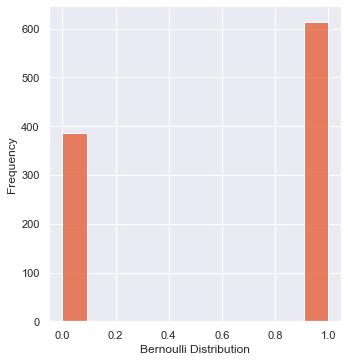

In [18]:
# Bernoulli Distribution
ber_data = bernoulli.rvs(size=1000, p=0.6)
ax = sns.displot(ber_data, kde=False, color='#E5582E')
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

[Text(0.5, 1.0, 'Probability = 0.8')]

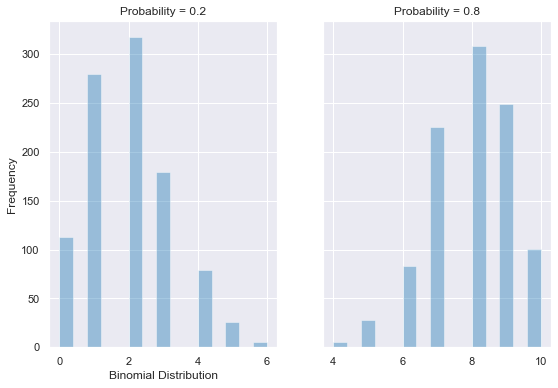

In [54]:
# binomial 
data_binom1 = binom.rvs(n=10,p=0.2,size=1000)
data_binom2 = binom.rvs(n=10,p=0.8,size=1000)
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(9, 6))
sns.distplot(data_binom1,
                  kde=False,
                  color='#1F77B4', ax=axes[0])
axes[0].set(xlabel='Binomial Distribution', ylabel='Frequency', title='Probability = 0.2')
sns.distplot(data_binom2,
                  kde=False,
                  color='#1F77B4', ax=axes[1])
axes[1].set(title='Probability = 0.8')

[Text(0.5, 0, 'Poisson Distribution'), Text(0, 0.5, 'Frequency')]

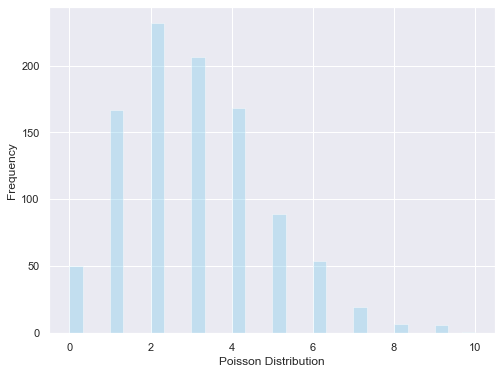

In [39]:
# Poisson distribution
data_poisson = poisson.rvs(mu=3, size=1000)  # mu = 3, number of events happened in a certain interval
ax = sns.distplot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue')
ax.set(xlabel='Poisson Distribution', ylabel='Frequency') 

In [2]:
# Poisson distribution
# overflow floods occur once every 100 years on average
# which means that lambda = 1 poisson.pmf(k, lambda)
# calculate the probability of different number of overflow floods
print(poisson.pmf(0, 1))
print(poisson.pmf(1, 1))
print(poisson.pmf(2, 1))  # time invertval is fixed

0.36787944117144233
0.36787944117144233
0.18393972058572114


/Users/Michael/.virtualenvs/pyfinance/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


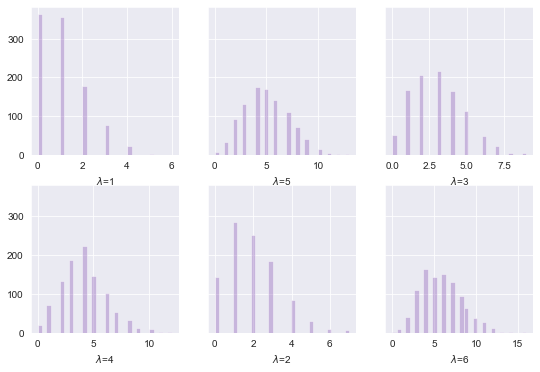

In [4]:
fg, axes = plt.subplots(2, 3, sharey=True, figsize=(9, 6))
for i in range(1, 7):
    sns.distplot(poisson.rvs(mu=i, size=1000), kde=False, bins=30, ax=axes[(i-1)%2, (i-1)%3], color='#9467BD')
    axes[(i-1)%2, (i-1)%3].set(xlabel=f'$\lambda$={i}')

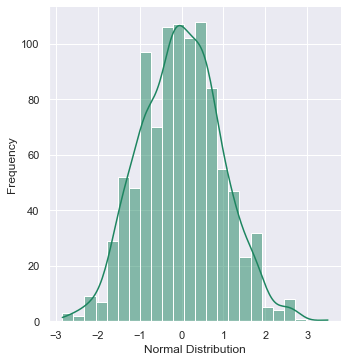

In [77]:
# normal distribution
# frequency with kenerl density estimate (kde=True)
nm_data = norm.rvs(size=1000, loc=0, scale=1)  # generate random numbers with mean = 0, std = 1
ax = sns.displot(nm_data, color='#1D8560', kde=True)
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

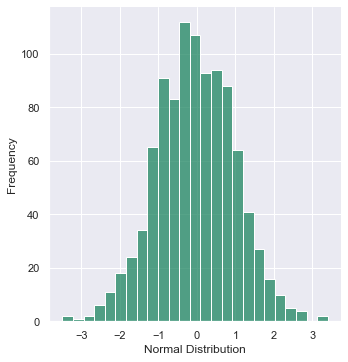

In [82]:
nm_data = norm.rvs(size=1000, loc=0, scale=1)  # generate random numbers with mean = 0, std = 1
ax = sns.displot(nm_data, color='#1D8560')
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

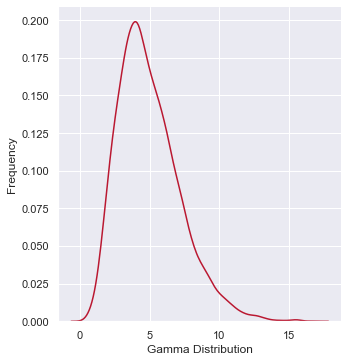

In [80]:
# gamma distribution, we use this one to update parameters in Baye's statistics 
data_gamma = gamma.rvs(a=5, size=10000)
ax = sns.displot(data_gamma,
                  kind='kde',
                  color='#BA1831')
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

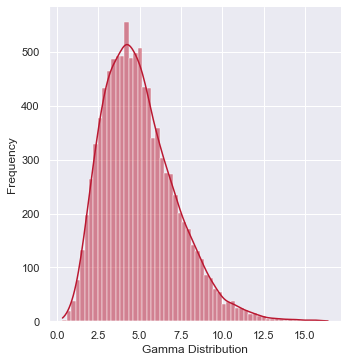

In [81]:
data_gamma = gamma.rvs(a=5, size=10000)
ax = sns.displot(data_gamma,
                  kind='hist',
                  kde=True,
                  color='#BA1831')
ax.set(xlabel='Gamma Distribution', ylabel='Frequency')

### Remarkd

`Seaborn` has replaced `distplot` with `displot`. The new function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots. The kind parameter selects the approach to use:

- histplot() (with kind="hist"; the default)

- kdeplot() (with kind="kde")

- ecdfplot() (with kind="ecdf"; univariate-only)

